In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score

from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            f1_score,
                            plot_confusion_matrix,
                            precision_recall_curve,
                            precision_score,
                            recall_score, roc_curve, 
                            roc_auc_score, 
                            make_scorer, plot_roc_curve)

In [2]:
master = pd.read_csv('./data/master.csv')
attributes = pd.read_csv('./data/attributes.csv')

In [3]:
master.head()

,Unnamed: 0,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,min_bid,mean_bid,median_bid,floor_sale_target,discount_target,premium_target
0,0,Sold,2017-06-23,4641,0.0,0.20,65,0.03,26.072368,0.33,0.03,0.03,0.192333,0.1,0,0,1
1,1,Sold,2017-06-23,4641,0.0,0.03,10,0.03,26.072368,0.33,0.03,0.03,0.192333,0.1,1,0,0
2,2,Sold,2017-06-23,5719,1.0,0.04,13,0.03,26.072368,0.33,0.03,0.03,0.192333,0.1,0,0,1
3,3,Sold,2017-06-23,1841,1.0,0.25,82,0.03,26.072368,0.33,0.03,0.03,0.192333,0.1,0,0,1
4,4,Sold,2017-06-23,5916,0.0,0.30,98,0.03,26.072368,0.33,0.03,0.03,0.192333,0.1,0,0,1


In [4]:
attributes.head()

,id,total_attrs,typerare,attcount,min,avg,rank,female,male,alien,...,nerd_glasses,big_shades,horned_rim_glasses,buck_teeth,hot_lipstick,purple_lipstick,black_lipstick,frowm,smile,scarcity_score
0,6487,0,38%,0.08%,0.08%,0.08%,0.000024576%,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000031
1,2204,0,38%,0.08%,0.08%,0.08%,0.000024576%,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000087
2,641,0,38%,0.08%,0.08%,0.08%,0.000024576%,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000092
3,1050,0,38%,0.08%,0.08%,0.08%,0.000024576%,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000093
4,3307,0,60%,0.08%,0.08%,0.08%,0.000038650%,0,1,0,...,0,0,0,0,0,0,0,0,0,0.000049


In [5]:
attributes.rename(columns={'id':'punk_id'}, inplace=True)

In [7]:
master = pd.merge(master, attributes, left_on='punk_id', right_on='punk_id', how='left')
master

,Unnamed: 0,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,...,nerd_glasses,big_shades,horned_rim_glasses,buck_teeth,hot_lipstick,purple_lipstick,black_lipstick,frowm,smile,scarcity_score
0,0,Sold,2017-06-23,4641,0.0,0.20,65,0.03,26.072368,0.330,...,0,0,0,0,0,0,0,0,0,1.883720e-06
1,1,Sold,2017-06-23,4641,0.0,0.03,10,0.03,26.072368,0.330,...,0,0,0,0,0,0,0,0,0,1.883720e-06
2,2,Sold,2017-06-23,5719,1.0,0.04,13,0.03,26.072368,0.330,...,0,0,0,0,0,0,0,0,0,6.797476e-07
3,3,Sold,2017-06-23,1841,1.0,0.25,82,0.03,26.072368,0.330,...,0,0,0,0,0,0,1,0,0,3.599134e-06
4,4,Sold,2017-06-23,5916,0.0,0.30,98,0.03,26.072368,0.330,...,0,0,0,0,0,0,0,0,0,9.281033e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,8419,Sold,2021-02-11,4041,0.0,20.00,34457,2.81,48.634911,15.245,...,0,0,0,0,0,0,0,0,0,2.832635e-05
8420,8420,Sold,2021-02-11,2306,4.0,125.00,217171,2.81,48.634911,15.245,...,0,0,0,0,0,0,0,0,0,4.127739e-06
8421,8421,Sold,2021-02-11,6784,1.0,130.00,224930,2.81,48.634911,15.245,...,0,0,0,0,0,0,0,1,0,4.778600e-07
8422,8422,Sold,2021-02-11,3986,0.0,7.05,12660,2.81,48.634911,15.245,...,0,0,0,0,0,0,1,0,0,1.317699e-07


In [8]:
master.drop(columns=['Unnamed: 0'], inplace=True)
master.head()

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,...,nerd_glasses,big_shades,horned_rim_glasses,buck_teeth,hot_lipstick,purple_lipstick,black_lipstick,frowm,smile,scarcity_score
0,Sold,2017-06-23,4641,0.0,0.20,65,0.03,26.072368,0.33,0.03,...,0,0,0,0,0,0,0,0,0,1.883720e-06
1,Sold,2017-06-23,4641,0.0,0.03,10,0.03,26.072368,0.33,0.03,...,0,0,0,0,0,0,0,0,0,1.883720e-06
2,Sold,2017-06-23,5719,1.0,0.04,13,0.03,26.072368,0.33,0.03,...,0,0,0,0,0,0,0,0,0,6.797476e-07
3,Sold,2017-06-23,1841,1.0,0.25,82,0.03,26.072368,0.33,0.03,...,0,0,0,0,0,0,1,0,0,3.599134e-06
4,Sold,2017-06-23,5916,0.0,0.30,98,0.03,26.072368,0.33,0.03,...,0,0,0,0,0,0,0,0,0,9.281033e-05


In [9]:
len(master['punk_id'].unique())

3990

## KMeans Clustering

In [10]:
list(master.columns)

['tx_type',
 'date',
 'punk_id',
 'transfer_count',
 'eth_amount',
 'dollar_amount',
 'floor_price',
 'mean_offer',
 'median_offer',
 'min_sale_price',
 'min_bid',
 'mean_bid',
 'median_bid',
 'floor_sale_target',
 'discount_target',
 'premium_target',
 'total_attrs',
 'typerare',
 'attcount',
 'min',
 'avg',
 'rank',
 'female',
 'male',
 'alien',
 'ape',
 'zombie',
 'albino',
 'dark',
 'light',
 'mid',
 'zero_attrs',
 'one_attrs',
 'two_attrs',
 'three_attrs',
 'four_attrs',
 'five_attrs',
 'six_attrs',
 'seven_attrs',
 'cap_forward',
 'do-rag',
 'cap',
 'cowboy_hat',
 'headband',
 'bandana',
 'fedora',
 'goat',
 'police_cap',
 'spots',
 'hoodie',
 'gold_chain',
 'top_hat',
 'earring',
 'knitted_cap',
 'purple_hair',
 'front_beard_dark',
 'front_beard',
 'vampire_hair',
 'normal_beard_black',
 'shaved_head',
 'peak_spike',
 'luxurious_beard',
 'mole',
 'chinstrap',
 'wild_hair',
 'mustache',
 'normal_beard',
 'mohawk_thin',
 'shadow_beard',
 'mohawk_dark',
 'mohawk',
 'crazy_hair',
 '

In [12]:
X = master[['female','male','alien','ape', 'zombie', 'albino', 'dark', 'light','mid',
             'zero_attrs', 'one_attrs', 'two_attrs', 'three_attrs', 'four_attrs','five_attrs', 'six_attrs',
         'seven_attrs', 'cap_forward', 'do-rag', 'cap','cowboy_hat', 'headband', 'bandana', 'fedora',
         'goat', 'police_cap', 'spots', 'hoodie', 'gold_chain', 'top_hat', 'earring', 'knitted_cap', 'purple_hair', 
            'front_beard_dark','front_beard', 'vampire_hair', 'normal_beard_black', 'shaved_head',
         'peak_spike', 'luxurious_beard', 'mole', 'chinstrap', 'wild_hair', 'mustache', 'normal_beard', 'mohawk_thin',
 'shadow_beard', 'mohawk_dark', 'mohawk', 'crazy_hair', 'stringy_hair', 'frumpy_hair', 'messy_hair', 'handlebars',
 'rosy_cheeks', 'choker', 'pilot_helmet', 'tiara','orange_side', 'beanie', 'welding_goggles', 'pigtails','pink_with_hat',
 'blonde_short', 'wild_white_hair', 'straight_hair_blonde', 'wild_blonde', 'half_shaved', 'blonde_bob', 'red_mohawk', 'clown_hair_green',
 'straight_hair_dark', 'dark_hair', 'silver_chain', 'straight_hair', 'medical_mask', 'tassle_hat', 'big_beard',
 'purple_eye_shadow','blue_eye_shadow', 'green_eye_shadow', 'pipe', 'vape', 'muttonchops', 'vr',
 'clown_nose', 'clown_eyes_green', 'clown_eyes_blue', '3d_glasses', 'classic_shades', 'regular_shades', 'small_shades',
 'cigarette', 'eye_patch','nerd_glasses', 'big_shades','horned_rim_glasses', 'buck_teeth', 'hot_lipstick', 
            'purple_lipstick', 'black_lipstick', 'frowm', 'smile']]

In [13]:
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [23]:
scores = []
for k in range(30,75): 
    cl = KMeans(n_clusters=k)
    cl.fit(scaled_X)
    inertia = cl.inertia_
    sil = silhouette_score(scaled_X, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']


In [24]:
score_df

,k,inertia,silhouette
0,30,610710.132309,0.104374
1,31,606836.551107,0.110805
2,32,599087.563313,0.113799
3,33,591001.796529,0.119333
4,34,577995.981347,0.127692
5,35,583907.265453,0.104419
6,36,571764.499773,0.123556
7,37,556929.141517,0.128736
8,38,557588.003722,0.132322
9,39,547640.974593,0.122389


Text(0.5, 1.0, 'Silhouette Score over k')

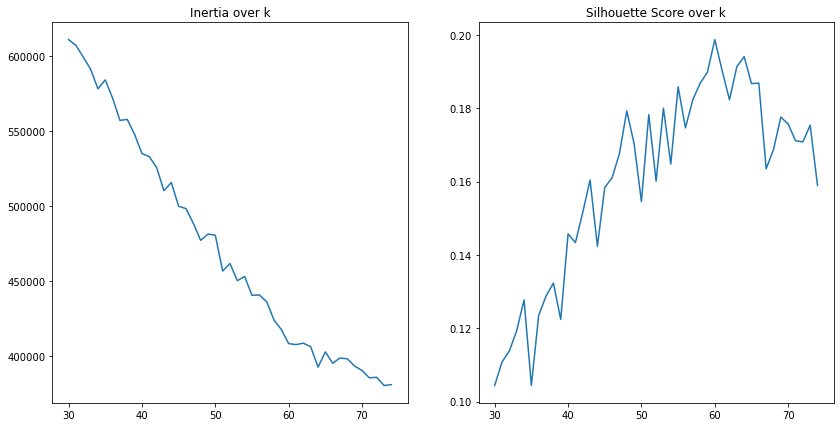

In [25]:
fig, axes = plt.subplots(1,2, figsize=(14,7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title("Inertia over k")
axes[1].plot(score_df.k, score_df.silhouette)
axes[1].set_title("Silhouette Score over k")

In [26]:
km = KMeans(n_clusters=60)
km.fit(scaled_X)

KMeans(n_clusters=60)

In [28]:
km.labels_

array([39, 39, 57, ..., 31, 56, 52])

In [29]:
km.predict(X)

array([ 6,  6,  6, ..., 11, 56, 52])

In [40]:
master['kmeans_clusters'] = km.labels_
master.head()

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,...,big_shades,horned_rim_glasses,buck_teeth,hot_lipstick,purple_lipstick,black_lipstick,frowm,smile,scarcity_score,kmeans_clusters
0,Sold,2017-06-23,4641,0.0,0.20,65,0.03,26.072368,0.33,0.03,...,0,0,0,0,0,0,0,0,1.883720e-06,39
1,Sold,2017-06-23,4641,0.0,0.03,10,0.03,26.072368,0.33,0.03,...,0,0,0,0,0,0,0,0,1.883720e-06,39
2,Sold,2017-06-23,5719,1.0,0.04,13,0.03,26.072368,0.33,0.03,...,0,0,0,0,0,0,0,0,6.797476e-07,57
3,Sold,2017-06-23,1841,1.0,0.25,82,0.03,26.072368,0.33,0.03,...,0,0,0,0,0,1,0,0,3.599134e-06,52
4,Sold,2017-06-23,5916,0.0,0.30,98,0.03,26.072368,0.33,0.03,...,0,0,0,0,0,0,0,0,9.281033e-05,14


In [41]:
master['premium_target']

0       1
1       0
2       1
3       1
4       1
       ..
8419    1
8420    1
8421    1
8422    1
8423    0
Name: premium_target, Length: 8424, dtype: int64

In [134]:
master.groupby('preds')[['female','male','alien','ape', 'zombie', 'albino', 'dark', 'light','mid',
             'zero_attrs', 'one_attrs', 'two_attrs', 'three_attrs', 'four_attrs','five_attrs', 'six_attrs',
         'seven_attrs', 'cap_forward', 'do-rag', 'cap','cowboy_hat', 'headband', 'bandana', 'fedora',
         'goat', 'police_cap', 'spots', 'hoodie', 'gold_chain', 'top_hat', 'earring', 'knitted_cap', 'purple_hair', 
            'front_beard_dark','front_beard', 'vampire_hair', 'normal_beard_black', 'shaved_head',
         'peak_spike', 'luxurious_beard', 'mole', 'chinstrap', 'wild_hair', 'mustache', 'normal_beard', 'mohawk_thin',
 'shadow_beard', 'mohawk_dark', 'mohawk', 'crazy_hair', 'stringy_hair', 'frumpy_hair', 'messy_hair', 'handlebars',
 'rosy_cheeks', 'choker', 'pilot_helmet', 'tiara','orange_side', 'beanie', 'welding_goggles', 'pigtails','pink_with_hat',
 'blonde_short', 'wild_white_hair', 'straight_hair_blonde', 'wild_blonde', 'half_shaved', 'blonde_bob', 'red_mohawk', 'clown_hair_green',
 'straight_hair_dark', 'dark_hair', 'silver_chain', 'straight_hair', 'medical_mask', 'tassle_hat', 'big_beard',
 'purple_eye_shadow','blue_eye_shadow', 'green_eye_shadow', 'pipe', 'vape', 'muttonchops', 'vr',
 'clown_nose', 'clown_eyes_green', 'clown_eyes_blue', '3d_glasses', 'classic_shades', 'regular_shades', 'small_shades',
 'cigarette', 'eye_patch','nerd_glasses', 'big_shades','horned_rim_glasses', 'buck_teeth', 'hot_lipstick', 
            'purple_lipstick', 'black_lipstick', 'frowm', 'smile']].mean()

,female,male,alien,ape,zombie,albino,dark,light,mid,zero_attrs,...,eye_patch,nerd_glasses,big_shades,horned_rim_glasses,buck_teeth,hot_lipstick,purple_lipstick,black_lipstick,frowm,smile
preds,,,,,,,,,,,,,,,,,,,,,
0,0.887658,0.000000,0.009494,0.039557,0.063291,0.170886,0.000000,0.330696,0.386076,0.004747,...,0.020570,0.034810,0.037975,0.018987,0.000000,0.060127,0.050633,0.058544,0.000000,0.000000
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.546549,0.453451,0.000000,0.000000,...,0.041734,0.022472,0.026485,0.042536,0.007223,0.000000,0.000000,0.000000,0.026485,0.020867
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.001168,...,0.101636,0.054907,0.081776,0.057243,0.004673,0.000000,0.000000,0.000000,0.054907,0.026869
3,0.970280,0.000000,0.001748,0.001748,0.026224,0.102273,0.000000,0.404720,0.463287,0.000000,...,0.016608,0.047203,0.042832,0.043706,0.000000,0.241259,0.210664,0.243881,0.003497,0.000874
4,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.006757,...,0.045045,0.031532,0.049550,0.054054,0.009009,0.000000,0.000000,0.000000,0.006757,0.018018
5,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.001029,...,0.080247,0.048354,0.090535,0.064815,0.006173,0.000000,0.000000,0.000000,0.084362,0.046296
6,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.026992,0.041131,0.039846,0.030848,0.000000,0.146530,0.152956,0.178663,0.000000,0.000000
7,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.003339,...,0.041736,0.031720,0.020033,0.026711,0.001669,0.000000,0.000000,0.000000,0.013356,0.031720
8,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.079958,0.056075,0.053998,0.070613,0.004154,0.000000,0.000000,0.000000,0.041537,0.018692


In [43]:
master.to_csv('./data/attributes.csv', index=False)

## DBSCAN 

In [34]:
db = DBSCAN()
db.fit(scaled_X)

DBSCAN()

In [36]:
silhouette_score(scaled_X, db.labels_)


-0.10745729344865639

In [ ]:
db.labels_

In [38]:
def find_best_silhouette(df): 
    # start with the lowest possible score
    max_score = -1
    # scale the data
    ss = StandardScaler()
    df_scaled = ss.fit_transform(df)
    #for loop over the 50 values from .2 to 5
    for eps in np.linspace(.2, 5, 50):
        # for loop the minimum samples
        for min_samples in range(2, int(len(df)/2)):
            # do the clustering
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(df_scaled)
            # check if you have enough labels, because obviously < 2 is a deal-breaker
            if len(set(dbscan.labels_)) > 1:
                # get the silhouette score
                score = silhouette_score(df_scaled, dbscan.labels_)
                nclusters = len(set(dbscan.labels_))
                # if the score is the best yet, save it!
                if score > max_score:
                    max_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_clusters = nclusters
    # print out the results
    print(f'Best silhoute score was {round(max_score, 2)}')
    print(f'Best eps was {round(best_eps, 2)}')
    print(f'Best min_samples was {best_min_samples}.')
    print(f'The model found {best_clusters} clusters.')
    print('Hurray! 🎉')
    return

In [39]:
find_best_silhouette(X)

KeyboardInterrupt: 

In [ ]:
from sklearn import metrics

db = DBSCAN(eps=1.2, min_samples=2).fit(X_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, labels))
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
master['dbscan_cluster'] = db.labels_
master.head()